In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [3]:
df = pd.read_csv('water_potability.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


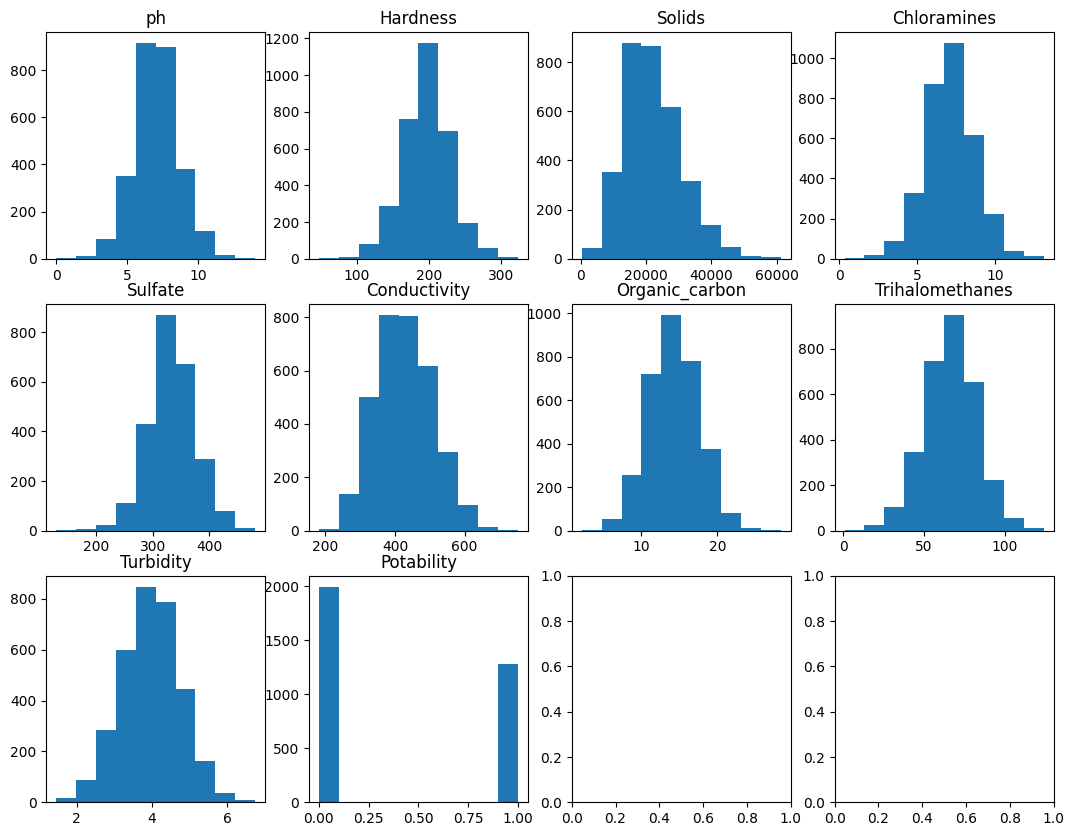

In [8]:
# Plota a distribuicao de cada feature
fig, ax = plt.subplots(3, 4, figsize=(13, 10))

row = 0
col = 0
max_col = 3

for feature in df.columns:
    ax[row, col].hist(df[feature], label=feature)
    ax[row, col].set_title(feature)
    if (col < max_col): col += 1
    else:
        row += 1
        col = 0

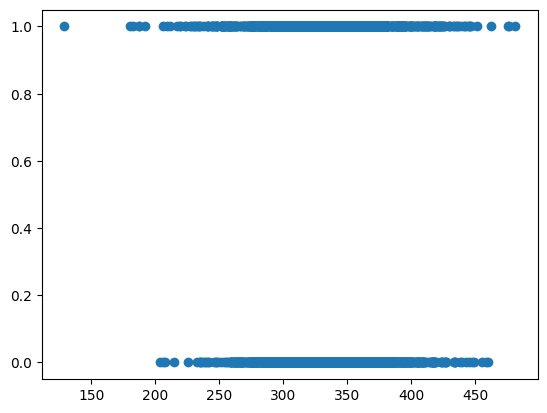

In [9]:
plt.scatter(data=df, x='Sulfate', y='Potability')

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Potability']), df['Potability'], test_size=.3, stratify=df['Potability'])

# define as etapas de pre processamento dos dados
pre_processing = Pipeline([
    ('nan_imputer', SimpleImputer()), # substitui os valores NaN pela media
    ('normalizer', StandardScaler()) # faz a normalizacao dos dados
])

def create_model(model, model_name, pre_processing):
    '''Cria um modelo
    model: Modelo do sklearn
    model_name: Nome do modelo
    pre_processing: Um Pipeline com as etapas de pre-processamento
    '''
    return Pipeline([
        ('pre_processing', pre_processing),
        (model_name, model)
    ])

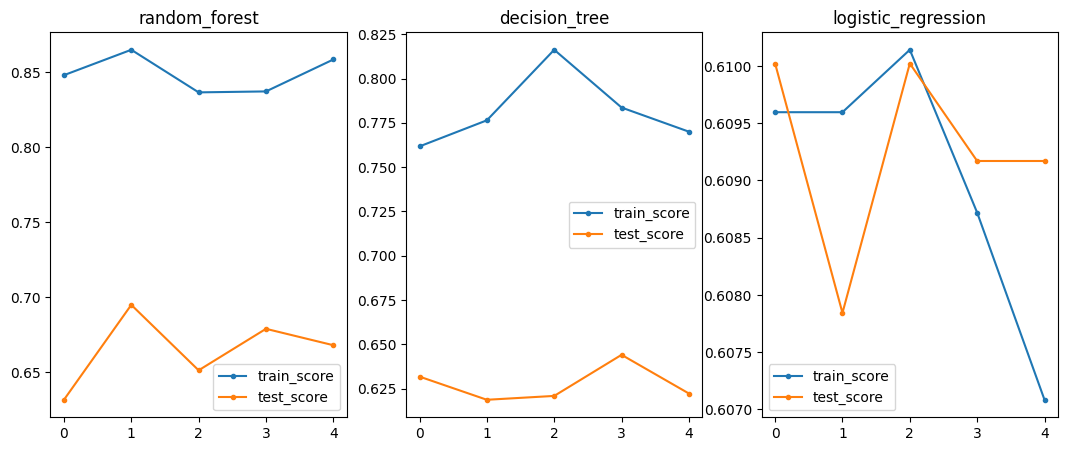

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

random_forest = create_model(RandomForestClassifier(max_depth=10), 'random_forest', pre_processing)
decision_tree = create_model(DecisionTreeClassifier(max_depth=10), 'decision_tree', pre_processing)
logistic_regression = create_model(LogisticRegression(), 'logistic_regression', pre_processing)

models = [random_forest, decision_tree, logistic_regression]

# plota os resultados de treino e teste em diversos modelos utilizando cross validation
_, ax = plt.subplots(1, 3, figsize=(13, 5))
for i, model in enumerate(models):
    results = cross_validate(model, X_train, y_train, return_train_score=True)
    ax[i].plot(results['train_score'], label='train_score', marker='.')
    ax[i].plot(results['test_score'], label='test_score', marker='.')
    ax[i].set_title(list(model.named_steps.keys())[1])
    ax[i].legend()